# SpiralArmsPotential model used in _The effects of bar–spiral coupling on stellar kinematics in the Galaxy_

In [114]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from galpy.potential import SpiralArmsPotential, MWPotential2014, plotPotentials, plotDensities, evaluateDensities, evaluatePotentials
from astropy import units as u
from scipy.optimize import minimize

### Common parameters

In [48]:
te = 6 * u.Gyr
N = 2 # number of arms
alpha = 9.9 * u.deg  # pitch angle, p in the paper
r_ref = 1 * u.kpc  # reference radius, Rs in the paper, r0 in paper by Cox and Gomez
H = 0.18 * u.kpc  # arbitrary, not specified in the paper
Rs = np.inf # ?! The paper does not include an exponential decay.
omega = 18.9 * u.km / u.s / u.kpc  # pattern speed
phi_ref = (-26 * u.deg).to(u.rad) - (omega * te) * u.rad # phi_ref + omega*te = -26 deg

### Amplitude parameter for 30% density contrast of the spiral arms w.r.t the background MWPotential2014

In [175]:
R0 = 8 * u.kpc
sp = SpiralArmsPotential(amp=1, N=N, alpha=alpha, Rs=Rs, R_ref=r_ref, H=H, phi_ref=phi_ref)
dens = 0.

result = minimize(lambda p: -sp.dens(R0, 0, float(p)), x0=0)
max_dens = -result.fun

print max_dens

mp_dens = evaluateDensities(MWPotential2014, R0, 0)
r = mp_dens / max_dens

0.0780093673195


In [176]:
result

      fun: -0.07800936731950017
 hess_inv: array([[ 3.2116914]])
      jac: array([ -4.24589962e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([ 0.48340881])

In [177]:
mp_dens, max_dens, r

(0.57508603122264867, 0.07800936731950017, 7.3720125028996764)

In [178]:
amp30 = r * 0.3
amp30

2.2116037508699029

In [195]:
# Check if amp30 matches the amplitude given in the paper.
amp30_paper = (341.8 * u.km**2 / u.s**2) / (220*u.km/u.s)**2
amp30_paper / r_ref / H * (8*u.kpc)**2

# Close enough

<Quantity 2.5109274563820017>

Note that the paper used the "surface density", i.e. density integrated over all z. I just used the midplane density because it was easier.

### Amplitude parameter for 60% density contrast of the spiral arms w.r.t the background MWPotential2014

In [180]:
amp60 = r * 0.6
amp60

4.4232075017398058

In [196]:
# Check if amp60 matches the amplitude given in the paper.
amp60_paper = (683.7 * u.km**2 / u.s**2) / (220*u.km/u.s)**2
amp60_paper / r_ref / H * (8*u.kpc)**2

#close enough

<Quantity 5.022589531680441>

Note that the paper used the "surface density", i.e. density integrated over all z. I just used the midplane density because it was easier.

## Plots

In [182]:
def plot_spiral(spiral_pot, log=False):
    ax = plotDensities(spiral_pot, log=log, xy=True, rmin=-8*u.kpc, rmax=8*u.kpc, zmin=-8*u.kpc, zmax=8*u.kpc, ncontours=3, nrs=50)
    ax.set_cmap('coolwarm')
    ax.colorbar = plt.colorbar(ax)
    #ax.__getattribute__('axes').set_ylim([8, -8])
    #ax.__getattribute__('axes').set_xlim([8, -8])

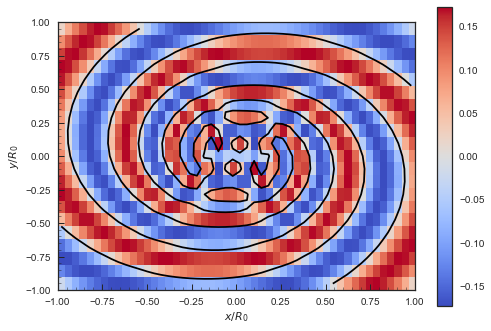

In [183]:
sp30 = SpiralArmsPotential(amp=amp30, N=N, alpha=alpha, Rs=Rs, R_ref=r_ref, H=H, phi_ref=phi_ref)
plot_spiral(sp30)
plt.show()

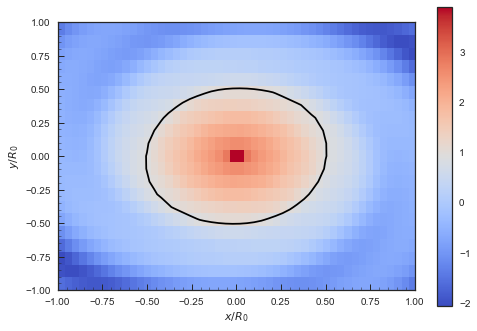

In [184]:
sp30_mp = [SpiralArmsPotential(amp=amp30, N=N, alpha=alpha, Rs=Rs, R_ref=r_ref, H=H, phi_ref=phi_ref)] \
+ MWPotential2014
plot_spiral(sp30_mp, log=True)
plt.show()

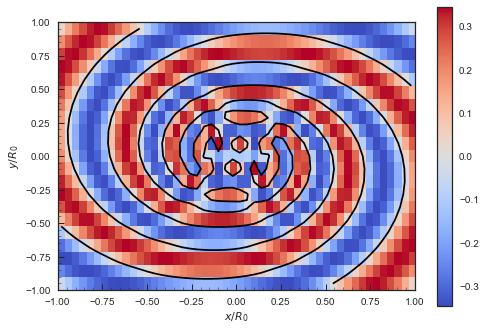

In [185]:
sp60 = SpiralArmsPotential(amp=amp60, N=N, alpha=alpha, Rs=Rs, R_ref=r_ref, H=H, phi_ref=phi_ref)
plot_spiral(sp60)
plt.show()

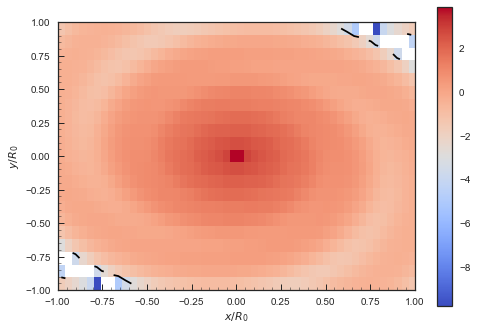

In [186]:
sp60_mp = [SpiralArmsPotential(amp=amp60, N=N, alpha=alpha, Rs=Rs, R_ref=r_ref, H=H, phi_ref=phi_ref)] \
+ MWPotential2014
plot_spiral(sp60_mp, log=True)
plt.show()

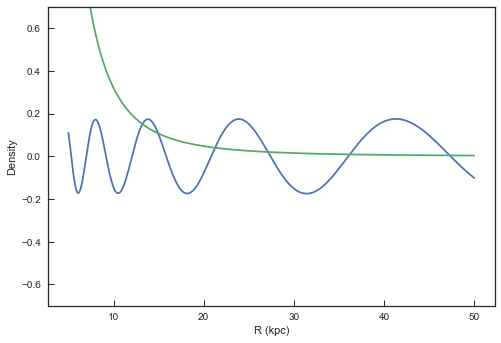

In [194]:
R = np.linspace(5, 50, 500) * u.kpc
dens_arr = []
mp_dens_arr = []
for Ri in R:
    dens_arr.append(sp30.dens(Ri, 0, result.x[0]))
    mp_dens_arr.append(evaluateDensities(MWPotential2014, Ri, 0))
    
plt.plot(R, dens_arr)
plt.plot(R, mp_dens_arr)
plt.xlabel('R (kpc)')
plt.ylabel('Density')
plt.ylim([-.7, .7])
plt.show()

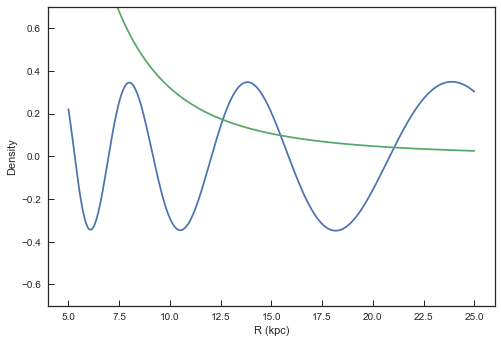

In [192]:
R = np.linspace(5, 25, 500) * u.kpc
dens_arr = []
mp_dens_arr = []
for Ri in R:
    dens_arr.append(sp60.dens(Ri, 0, result.x[0]))
    mp_dens_arr.append(evaluateDensities(MWPotential2014, Ri, 0))
    
plt.plot(R, dens_arr)
plt.plot(R, mp_dens_arr)
plt.xlabel('R (kpc)')
plt.ylabel('Density')
plt.ylim([-.7, .7])
plt.show()

inf


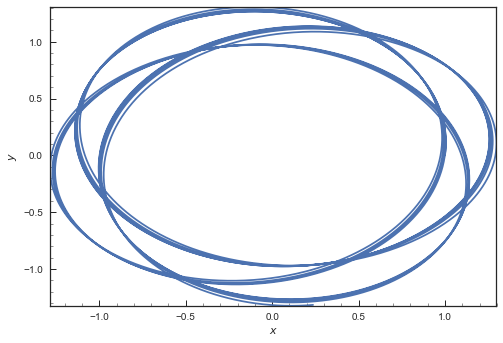

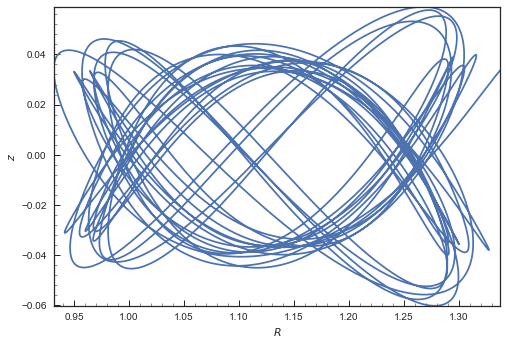

In [200]:
from galpy.orbit import Orbit

sp30_mp = [SpiralArmsPotential(amp=amp30, N=N, alpha=alpha, Rs=Rs, R_ref=r_ref, H=H, phi_ref=phi_ref)] \
+ MWPotential2014

print Rs
orb = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])

ts = np.linspace(0,100,10000)
orb.integrate(ts, sp30_mp, method='symplec4_c')

orb.plot(d1='x', d2='y')
orb.plot()

plt.show()

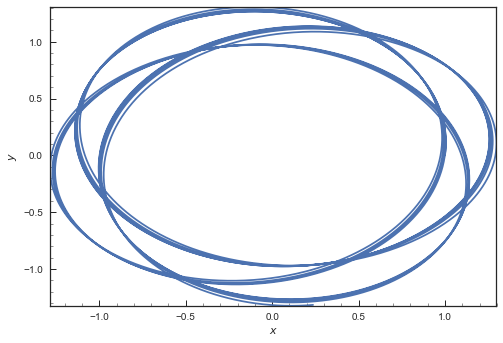

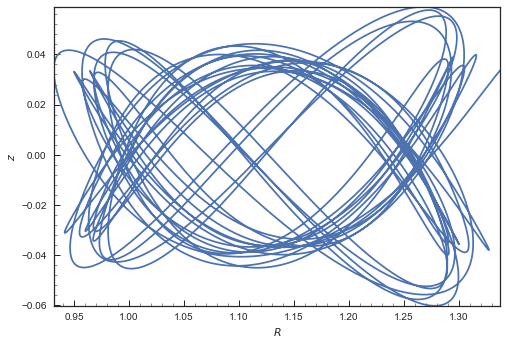

In [199]:
sp60_mp = [SpiralArmsPotential(amp=amp60, N=N, alpha=alpha, Rs=Rs, R_ref=r_ref, H=H, phi_ref=phi_ref)] \
+ MWPotential2014

orb = Orbit(vxvv=[1, 0.1, 1.1, 0, 0.1, 0])

ts = np.linspace(0,100,10000)
orb.integrate(ts, sp30_mp, method='symplec4_c')

orb.plot(d1='x', d2='y')
orb.plot()

plt.show()